# Wstęp do Sztucznej Inteligencji - rok akademicki 2019/2020

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat:  Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

Na niniejszych laboratoriach będziemy wykorzystywać bibliotekę `fuzzython`(https://github.com/yudivian/fuzzython). Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby móc z niego zkorzystać należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na elf'ie), rozpakować go i wrzucić na dysk google, a następnie wykonać poniższą komórkę montującą dysk google:


In [0]:
import sys
from google.colab import drive
drive.mount('/content/drive')
# upewniej się że poniższa ścieżka jest poprawna
path_nb = r'/content/drive/My Drive/Colab Notebooks/'
sys.path.append(path_nb)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

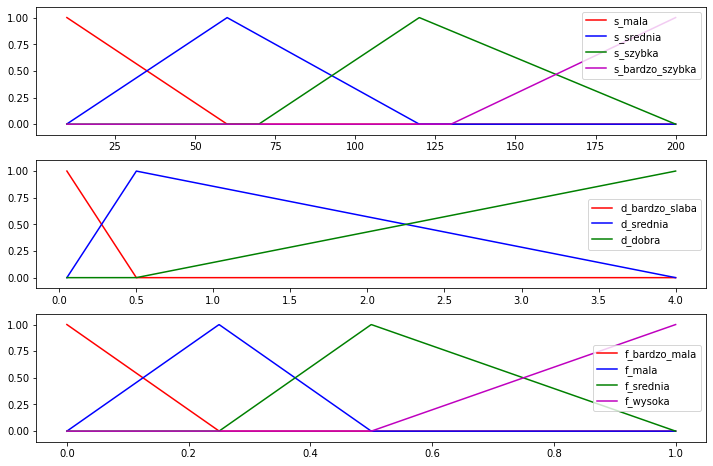

{'rb_mamdani': {'wypadek': 0.5537306642402179}}

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.mamdani import MamdaniSystem
from mpl_toolkits.mplot3d import Axes3D

# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()



# predkosc
s_mala = Triangular((9.9,0), (10,1), (60,0))
s_srednia = Triangular((9.9,0), (60,1), (120,0))
s_szybka = Triangular((69.9,0), (120,1), (200,0))
s_bardzo_szybka = Triangular((129.9,0), (200,1), (200.1,0))
a_s_mala = Adjective('s_mala', s_mala)
a_s_srednia  = Adjective('s_srednia ', s_srednia )
a_s_szybka  = Adjective('s_szybka ', s_szybka )
a_s_bardzo_szybka= Adjective('s_bardzo_szybka', s_bardzo_szybka)
predkosc = Variable('predkosc', 'km/h', a_s_mala, a_s_srednia , a_s_szybka , a_s_bardzo_szybka)

# widocznosc
d_bardzo_slaba = Triangular((0.04,0), (0.05,1), (0.5,0))
d_srednia = Triangular((0.05,0), (0.5,1), (4,0))
d_dobra = Triangular((0.5,0), (4,1), (4.01,0))
a_d_bardzo_slaba = Adjective('d_bardzo_slaba', d_bardzo_slaba)
a_d_srednia = Adjective('d_srednia', d_srednia)
a_d_dobra = Adjective('d_dobra', d_dobra)
widocznosc = Variable('widocznosc', 'km', a_d_bardzo_slaba, a_d_srednia, a_d_dobra)

#wypadek
f_bardzo_mala = Triangular((-0.1,0), (0,1), (0.25,0))
f_mala= Triangular((0,0), (0.25,1), (0.5,0))
f_srednia = Triangular((0.25,0), (0.5,1), (1,0))
f_wysoka = Triangular((0.5,0), (1,1), (1.1,0))
a_f_bardzo_mala = Adjective('f_bardzo_mala', f_bardzo_mala)
a_f_mala = Adjective('f_mala', f_mala)
a_f_srednia = Adjective('f_srednia', f_srednia)
a_f_wysoka = Adjective('f_wysoka', f_wysoka)
wypadek = Variable('wypadek', '%', a_f_bardzo_mala, a_f_mala, a_f_srednia, a_f_wysoka,defuzzification= 'COG', default = 0)

#wykresy
x1 = np.linspace(10,200,1000)
x2 = np.linspace(0.05,4,1000)
x3 = np.linspace(0,1,1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, s_mala, x1, 'r', label='s_mala')
plot_fuzzyset(ax1, s_srednia , x1, 'b', label='s_srednia ')
plot_fuzzyset(ax1, s_szybka , x1, 'g', label='s_szybka ')
plot_fuzzyset(ax1, s_bardzo_szybka, x1, 'm', label='s_bardzo_szybka')

plot_fuzzyset(ax2, d_bardzo_slaba, x2, 'r', label='d_bardzo_slaba')
plot_fuzzyset(ax2, d_srednia, x2, 'b', label='d_srednia')
plot_fuzzyset(ax2, d_dobra, x2, 'g', label='d_dobra')

plot_fuzzyset(ax3, f_bardzo_mala, x3, 'r', label='f_bardzo_mala')
plot_fuzzyset(ax3, f_mala, x3, 'b', label='f_mala')
plot_fuzzyset(ax3, f_srednia, x3, 'g', label='f_srednia')
plot_fuzzyset(ax3, f_wysoka, x3, 'm', label='f_wysoka')
plt.show()
#reguly
scope = locals()
r1 = 'if predkosc is a_s_mala or widocznosc is a_d_dobra then wypadek is a_f_bardzo_mala'
r2 = 'if predkosc is a_s_srednia or widocznosc is a_d_srednia then wypadek is a_f_mala'
r3 = 'if predkosc is a_s_szybka  or widocznosc is a_d_bardzo_slaba then wypadek is a_f_srednia'
r4 = 'if predkosc is a_s_bardzo_szybka or widocznosc is a_d_bardzo_slaba then wypadek is a_f_wysoka'

block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(r1, r2, r3, r4, scope=scope)

mamdani = MamdaniSystem('mamdani_model', block)
#wynik
inputs = {'predkosc': 200, 'widocznosc': 2}
res = mamdani.compute(inputs)
res



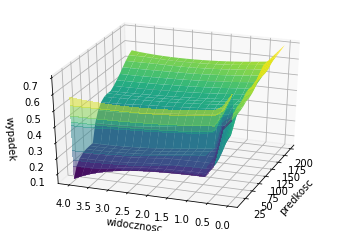

In [0]:
sampled_s = np.linspace(10, 200, 20)
sampled_v =np.linspace(0.05,4,20)
x, y = np.meshgrid(sampled_s, sampled_v)
z = np.zeros((len(sampled_s),len(sampled_v)))

for i in range(len(sampled_s)):
    for j in range(len(sampled_v)):
        inputs = {'predkosc': x[i, j], 'widocznosc': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['wypadek']
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('predkosc')
ax.set_ylabel('widocznosc')
ax.set_zlabel('wypadek')
ax.view_init(30, 200)

## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

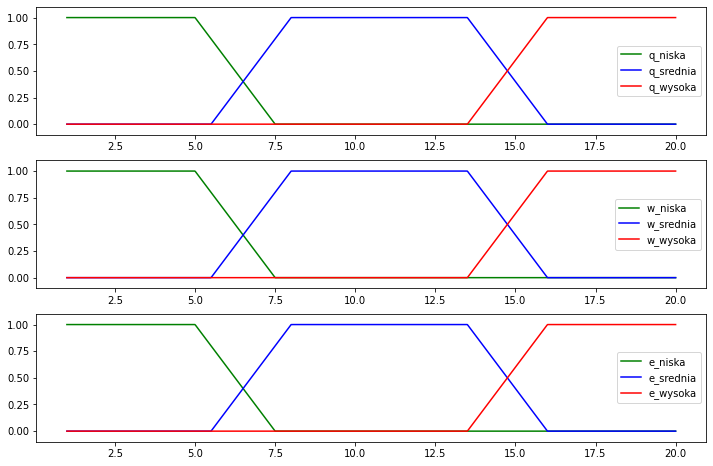

In [0]:
from fuzzython.fsets.trapezoid import Trapezoid
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.sugeno import SugenoSystem
from mpl_toolkits.mplot3d import Axes3D
# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()
q_niska = Trapezoid((0.9,0), (1,1), (5,1),(7.5,0))
q_srednia = Trapezoid((5.5,0), (8,1), (13.5,1),(16,0))
q_wysoka = Trapezoid((13.5,0), (16,1), (20,1),(20.1,1))
a_q_niska = Adjective('q_niska', q_niska)
a_q_srednia = Adjective('q_srednia', q_srednia)
a_q_wysoka = Adjective('q_wysoka', q_wysoka)
w = Variable('w', 'zl', a_q_niska, a_q_srednia, a_q_wysoka)



w_niska = Trapezoid((0.9,0), (1,1), (5,1),(7.5,0))
w_srednia = Trapezoid((5.5,0), (8,1), (13.5,1),(16,0))
w_wysoka = Trapezoid((13.5,0), (16,1), (20,1),(20.1,1))
a_w_niska  = Adjective('w_niska ', w_niska )
a_w_srednia = Adjective('w_srednia', w_srednia)
a_w_wysoka= Adjective('w_wysoka', w_wysoka)
d = Variable('d', 'zl', a_w_niska , a_w_srednia, a_w_wysoka)



e_niska = Trapezoid((0.9,0), (1,1), (5,1),(7.5,0))
e_srednia = Trapezoid((5.5,0), (8,1), (13.5,1),(16,0))
e_wysoka= Trapezoid((13.5,0), (16,1), (20,1),(20.1,1))
a_e_niska = Adjective('e_niska', e_niska)
a_e_srednia = Adjective('e_srednia', e_srednia)
a_e_wysoka = Adjective('e_wysoka', e_wysoka)
j= Variable('j', '%', a_e_niska, a_e_srednia, a_e_wysoka, defuzzification='COG', default=0)

# wykresy poglądowe
x = np.linspace(1,20,1000)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, q_niska, x, 'g', label='q_niska')
plot_fuzzyset(ax1, q_srednia, x, 'b', label='q_srednia')
plot_fuzzyset(ax1, q_wysoka, x, 'r', label='q_wysoka')


plot_fuzzyset(ax2, w_niska , x, 'g', label='w_niska ')
plot_fuzzyset(ax2, w_srednia, x, 'b', label='w_srednia')
plot_fuzzyset(ax2, w_wysoka, x, 'r', label='w_wysoka')


plot_fuzzyset(ax3, e_niska, x, 'g', label='e_niska')
plot_fuzzyset(ax3, e_srednia, x, 'b', label='e_srednia')
plot_fuzzyset(ax3,e_wysoka, x, 'r', label='e_wysoka')
plt.show()

scope = locals()
#w-wczoraj j-jutro d-dzis
r1 = 'if w is a_q_niska and d is a_w_niska  then j=0.5*w+0.2*d-1'
r2 = 'if w is a_q_niska and d is a_w_srednia then j=0.4*w+0.9*d+0'
r3 = 'if w is a_q_niska and d is a_w_wysoka then j=0.4*w+0.2*d+1'
r4 = 'if w is a_q_srednia and d is a_w_niska  then j=0.6*w+0.5*d-0.5'
r5 = 'if w is a_q_srednia and d is a_w_srednia then j=0.5*w+0.2*d+1'
r6 = 'if w is a_q_srednia and d is a_w_wysoka then j=0.4*w+0.1*d+0.5'
r7 = 'if w is a_q_wysoka and d is a_w_niska  then j=0.2*w+0.3*d-1'
r8 = 'if w is a_q_wysoka and d is a_w_srednia then j=0.6*w+0.8*d-1'
r9 = 'if w is a_q_wysoka and d is a_w_wysoka then j=0.1*w+0.1*d+0'

block = RuleBlock('rb_takagi', operators=('MIN', 'MAX', 'ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(r1, r2, r3, r4, r5, r6, r7, r8, r9, scope=scope)
sugeno = SugenoSystem('model_takagi', block)

&copy; Katedra Informatyki, Politechnika Krakowska

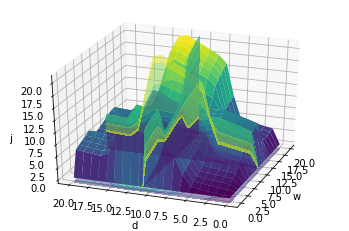

In [0]:
sampled = np.linspace(0, 20, 20)
x, y = np.meshgrid(sampled, sampled)
z = np.zeros((len(sampled),len(sampled)))

for i in range(len(sampled)):
    for j in range(len(sampled)):
        inputs = {'w': x[i, j], 'd': y[i, j]}
        res = sugeno.compute(inputs)
        z[i, j] = res['rb_takagi']
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('w')
ax.set_ylabel('d')
ax.set_zlabel('j')
ax.view_init(30, 200)